# Allosteric parameters in receptor dimers

Quantitative pharmacologists construct Markov chain models to give insight into the relationship between ligand concentration and the fraction of cell surface receptors in each of several molecular conformations. Pharmacologists use these stochastic models to understand the action of natural ligands and drugs on receptor\-mediated cell responses. When receptors function as two or more similar protein subunits working in concert \(i.e., homodimers or oligomers\), receptor models must

1. account for symmetry,

2. satisfy thermodynamic constraints, and

3. properly account for subunit interactions \(allostery\) mediated by conformational coupling.

The modeling framework presented below satisfies these three requirements.  



The file `MyTools.ipynb` is includes several function definitions whose use is illustrated below.


In [1]:
%run MyTools.ipynb

In [2]:
verbose = True

Below`sagemath` methods are used to create and plot a graph that represents the topology of the states and transitions of the receptor model.  The vertices are integers. The edge labels are currently `None` so these are not shown \(the `show` method includes `edge_labels=False)`


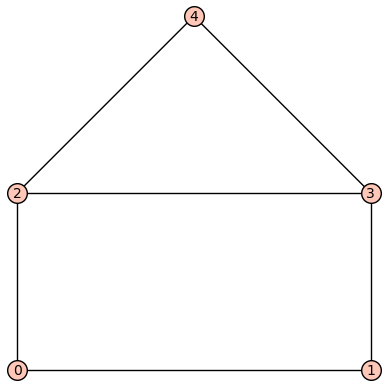

In [3]:
G=graphs.HouseGraph();
G.show(edge_labels=False)

The following commands produces a spanning tree of the receptor model rooted in vertex 0.  The function `add_edge_monomials(G)` defined variables from a polynomial ring and applies them edge labels to the graph.  The default method uses $e_1, e_2, \ldots$. Using `method='alpha'` in `add_edge_monomials()` creates single digit edge labels \($b,c,\ldots$\).


In [4]:
#my_method = 'alpha'
my_method = 'integer'

The edge labels (e1, e2, e3, e4) are indeterminants in a Multivariate Polynomial Ring in e1, e2, e3, e4 over Integer Ring


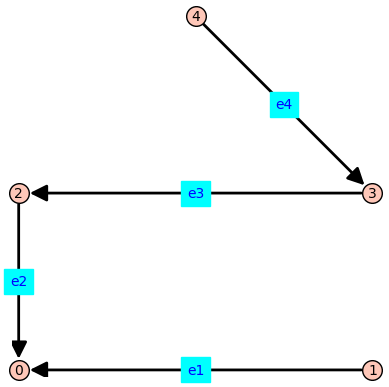

In [5]:
(BFS_Vertices,BFS_Tree) = G.lex_BFS(tree=True,initial_vertex=0)
(T,E)=add_edge_monomials(BFS_Tree,method=my_method,ring=True,short_name=True)
if verbose: print(f'The edge labels {E.gens()} are indeterminants in a {E}')
T.set_pos(G.get_pos())
T.show(edge_labels=True)

In [6]:
F = [E(0)]
for v in BFS_Vertices[1:]: # every elemenet except the first (the root 0, which has been set to E(0)
    P = T.all_paths(v, 0, use_multiedges=False, report_edges=True, labels=True)
    f=0
    for p in P[0]:  # there is only one path, so take the first, which is P[0]
        f = f+p[2] # p[0] & p[1] are vertices; p[2] is edge_label
    F.append(f)
show(F)

[0, e1, e2, e3 + e2, e4 + e3 + e2]

In [7]:
KappaVars = []; KappaNames = []
for e in E.gens():
    estr = str(e)
    if len(estr)!=1:
        estr=estr.replace('e','')
    var = 'kappa_'+estr
    KappaVars.append(var)
    KappaNames.append('\\kappa_{\\mathit{' + estr + '}}')
if verbose: print(KappaVars); print(KappaNames)

['kappa_1', 'kappa_2', 'kappa_3', 'kappa_4']
['\\kappa_{\\mathit{1}}', '\\kappa_{\\mathit{2}}', '\\kappa_{\\mathit{3}}', '\\kappa_{\\mathit{4}}']


In [8]:
nv = len(F) # nv = G.order()
EtaProb = zeros(nv); EtaMons = zeros(nv); EtaCoef = zeros(nv)
for i0 in range(nv):
    for i1 in range(i0,nv):
        fprod=F[i0]*F[i1]
        EtaProb[i0][i1]=fprod
        EtaMons[i0][i1]=fprod.monomials()
        EtaCoef[i0][i1]=fprod.coefficients()
if verbose: show(table(EtaProb)); show(table(EtaMons)); show(table(EtaCoef))

\(0\),\(0\),\(0\),\(0\),\(0\)
\(0\),\(e_{1}^{2}\),\(e_{1} e_{2}\),\(e_{1} e_{3} + e_{1} e_{2}\),\(e_{1} e_{4} + e_{1} e_{3} + e_{1} e_{2}\)
\(0\),\(0\),\(e_{2}^{2}\),\(e_{2} e_{3} + e_{2}^{2}\),\(e_{2} e_{4} + e_{2} e_{3} + e_{2}^{2}\)
\(0\),\(0\),\(0\),\(e_{3}^{2} + 2 e_{2} e_{3} + e_{2}^{2}\),\(e_{3} e_{4} + e_{2} e_{4} + e_{3}^{2} + 2 e_{2} e_{3} + e_{2}^{2}\)
\(0\),\(0\),\(0\),\(0\),\(e_{4}^{2} + 2 e_{3} e_{4} + 2 e_{2} e_{4} + e_{3}^{2} + 2 e_{2} e_{3} + e_{2}^{2}\)


\(\left[\right]\),\(\left[\right]\),\(\left[\right]\),\(\left[\right]\),\(\left[\right]\)
\(0\),\(\left[e_{1}^{2}\right]\),\(\left[e_{1} e_{2}\right]\),"\(\left[e_{1} e_{3}, e_{1} e_{2}\right]\)","\(\left[e_{1} e_{4}, e_{1} e_{3}, e_{1} e_{2}\right]\)"
\(0\),\(0\),\(\left[e_{2}^{2}\right]\),"\(\left[e_{2} e_{3}, e_{2}^{2}\right]\)","\(\left[e_{2} e_{4}, e_{2} e_{3}, e_{2}^{2}\right]\)"
\(0\),\(0\),\(0\),"\(\left[e_{3}^{2}, e_{2} e_{3}, e_{2}^{2}\right]\)","\(\left[e_{3} e_{4}, e_{2} e_{4}, e_{3}^{2}, e_{2} e_{3}, e_{2}^{2}\right]\)"
\(0\),\(0\),\(0\),\(0\),"\(\left[e_{4}^{2}, e_{3} e_{4}, e_{2} e_{4}, e_{3}^{2}, e_{2} e_{3}, e_{2}^{2}\right]\)"


\(\left[\right]\),\(\left[\right]\),\(\left[\right]\),\(\left[\right]\),\(\left[\right]\)
\(0\),\(\left[1\right]\),\(\left[1\right]\),"\(\left[1, 1\right]\)","\(\left[1, 1, 1\right]\)"
\(0\),\(0\),\(\left[1\right]\),"\(\left[1, 1\right]\)","\(\left[1, 1, 1\right]\)"
\(0\),\(0\),\(0\),"\(\left[1, 2, 1\right]\)","\(\left[1, 1, 1, 2, 1\right]\)"
\(0\),\(0\),\(0\),\(0\),"\(\left[1, 2, 2, 1, 2, 1\right]\)"


In [9]:
UniqueMons = []
for mon in sorted(set(flatten(EtaMons))):
    UniqueMons.append(mon)
if verbose: show(UniqueMons)

[0, e1^2, e1*e2, e2^2, e1*e3, e2*e3, e3^2, e1*e4, e2*e4, e3*e4, e4^2]

In [10]:
EtaVars = []; EtaNames = []
for mon in UniqueMons:
    var = str(mon)
    var = var.replace('*', '')
    if my_method=='alpha':
        nchar=1
    else:
        nchar=2
    var = replace_powers(var,nchar)
    EtaVars.append('eta_'+var)
    if my_method=='alpha':
        EtaNames.append('\\eta_{\\mathit{' + var + '}}')
    else:
        EtaNames.append('\\eta_{\\mathit{' + var.replace('e','') + '}}')
if verbose: print(EtaVars); print(EtaNames)

['eta_0', 'eta_e1e1', 'eta_e1e2', 'eta_e2e2', 'eta_e1e3', 'eta_e2e3', 'eta_e3e3', 'eta_e1e4', 'eta_e2e4', 'eta_e3e4', 'eta_e4e4']
['\\eta_{\\mathit{0}}', '\\eta_{\\mathit{11}}', '\\eta_{\\mathit{12}}', '\\eta_{\\mathit{22}}', '\\eta_{\\mathit{13}}', '\\eta_{\\mathit{23}}', '\\eta_{\\mathit{33}}', '\\eta_{\\mathit{14}}', '\\eta_{\\mathit{24}}', '\\eta_{\\mathit{34}}', '\\eta_{\\mathit{44}}']


In [11]:
PiVars = [ 'p'+str(i) for i in range(len(F))]
PiNames = [ '\\pi_{\\mathit{' + str(i) + '}}' for i in range(len(F))]
if verbose: print(PiVars)
if verbose: print(PiNames)

['p0', 'p1', 'p2', 'p3', 'p4']
['\\pi_{\\mathit{0}}', '\\pi_{\\mathit{1}}', '\\pi_{\\mathit{2}}', '\\pi_{\\mathit{3}}', '\\pi_{\\mathit{4}}']


In [12]:
A=PolynomialRing(ZZ,names=PiVars+KappaVars+EtaVars,order='invlex')
A.inject_variables()
A._latex_names = PiNames+KappaNames+EtaNames 
# https://ask.sagemath.org/question/8202/how-to-give-latex-names-to-generators-of-polynomial-rings/

Defining p0, p1, p2, p3, p4, kappa_1, kappa_2, kappa_3, kappa_4, eta_0, eta_e1e1, eta_e1e2, eta_e2e2, eta_e1e3, eta_e2e3, eta_e3e3, eta_e1e4, eta_e2e4, eta_e3e4, eta_e4e4


In [13]:
d_vars=dict(zip(list(E.gens())+UniqueMons,list(A.gens()[nv:]))) # len(F): because we do not want to include p1,p2,...
d_vars[E(1)]=1
if verbose: print(d_vars)

{e1: kappa_1, e2: kappa_2, e3: kappa_3, e4: kappa_4, 0: eta_0, e1^2: eta_e1e1, e1*e2: eta_e1e2, e2^2: eta_e2e2, e1*e3: eta_e1e3, e2*e3: eta_e2e3, e3^2: eta_e3e3, e1*e4: eta_e1e4, e2*e4: eta_e2e4, e3*e4: eta_e3e4, e4^2: eta_e4e4, 1: 1}


In [14]:
KappaProb = zeros(nv); KappaMons = zeros(nv); KappaCoef = zeros(nv);
Kappa = repmat(A(1),nv)
for i0 in range(nv):
    for i1 in range(nv):
        if i0 <= i1:
            fsum = F[i0]+F[i1]
            KappaProb[i0][i1]=fsum
            KappaMons[i0][i1]=fsum.monomials()
            KappaCoef[i0][i1]=fsum.coefficients()
            for m in range(len(KappaMons[i0][i1])):
                mon = KappaMons[i0][i1][m]
                Kappa[i0][i1]*= d_vars[mon]^KappaCoef[i0][i1][m]
            if i0!=i1:
                Kappa[i0][i1]*=2
        else:
            Kappa[i0][i1]=0
if verbose:
    show(table(KappaProb)); show(table(KappaMons)); show(table(KappaCoef)); show(table(Kappa))

\(0\),\(e_{1}\),\(e_{2}\),\(e_{3} + e_{2}\),\(e_{4} + e_{3} + e_{2}\)
\(0\),\(2 e_{1}\),\(e_{2} + e_{1}\),\(e_{3} + e_{2} + e_{1}\),\(e_{4} + e_{3} + e_{2} + e_{1}\)
\(0\),\(0\),\(2 e_{2}\),\(e_{3} + 2 e_{2}\),\(e_{4} + e_{3} + 2 e_{2}\)
\(0\),\(0\),\(0\),\(2 e_{3} + 2 e_{2}\),\(e_{4} + 2 e_{3} + 2 e_{2}\)
\(0\),\(0\),\(0\),\(0\),\(2 e_{4} + 2 e_{3} + 2 e_{2}\)


\(\left[\right]\),\(\left[e_{1}\right]\),\(\left[e_{2}\right]\),"\(\left[e_{3}, e_{2}\right]\)","\(\left[e_{4}, e_{3}, e_{2}\right]\)"
\(0\),\(\left[e_{1}\right]\),"\(\left[e_{2}, e_{1}\right]\)","\(\left[e_{3}, e_{2}, e_{1}\right]\)","\(\left[e_{4}, e_{3}, e_{2}, e_{1}\right]\)"
\(0\),\(0\),\(\left[e_{2}\right]\),"\(\left[e_{3}, e_{2}\right]\)","\(\left[e_{4}, e_{3}, e_{2}\right]\)"
\(0\),\(0\),\(0\),"\(\left[e_{3}, e_{2}\right]\)","\(\left[e_{4}, e_{3}, e_{2}\right]\)"
\(0\),\(0\),\(0\),\(0\),"\(\left[e_{4}, e_{3}, e_{2}\right]\)"


\(\left[\right]\),\(\left[1\right]\),\(\left[1\right]\),"\(\left[1, 1\right]\)","\(\left[1, 1, 1\right]\)"
\(0\),\(\left[2\right]\),"\(\left[1, 1\right]\)","\(\left[1, 1, 1\right]\)","\(\left[1, 1, 1, 1\right]\)"
\(0\),\(0\),\(\left[2\right]\),"\(\left[1, 2\right]\)","\(\left[1, 1, 2\right]\)"
\(0\),\(0\),\(0\),"\(\left[2, 2\right]\)","\(\left[1, 2, 2\right]\)"
\(0\),\(0\),\(0\),\(0\),"\(\left[2, 2, 2\right]\)"


\(1\),\(2 \kappa_{\mathit{1}}\),\(2 \kappa_{\mathit{2}}\),\(2 \kappa_{\mathit{2}} \kappa_{\mathit{3}}\),\(2 \kappa_{\mathit{2}} \kappa_{\mathit{3}} \kappa_{\mathit{4}}\)
\(0\),\(\kappa_{\mathit{1}}^{2}\),\(2 \kappa_{\mathit{1}} \kappa_{\mathit{2}}\),\(2 \kappa_{\mathit{1}} \kappa_{\mathit{2}} \kappa_{\mathit{3}}\),\(2 \kappa_{\mathit{1}} \kappa_{\mathit{2}} \kappa_{\mathit{3}} \kappa_{\mathit{4}}\)
\(0\),\(0\),\(\kappa_{\mathit{2}}^{2}\),\(2 \kappa_{\mathit{2}}^{2} \kappa_{\mathit{3}}\),\(2 \kappa_{\mathit{2}}^{2} \kappa_{\mathit{3}} \kappa_{\mathit{4}}\)
\(0\),\(0\),\(0\),\(\kappa_{\mathit{2}}^{2} \kappa_{\mathit{3}}^{2}\),\(2 \kappa_{\mathit{2}}^{2} \kappa_{\mathit{3}}^{2} \kappa_{\mathit{4}}\)
\(0\),\(0\),\(0\),\(0\),\(\kappa_{\mathit{2}}^{2} \kappa_{\mathit{3}}^{2} \kappa_{\mathit{4}}^{2}\)


In [15]:
Eta = repmat(A(1),nv)
for i0 in range(nv):
    for i1 in range(nv):
        if i0 <= i1:
            for m in range(len(EtaMons[i0][i1])):
                mon = EtaMons[i0][i1][m]
                Eta[i0][i1] *= d_vars[mon] ** EtaCoef[i0][i1][m]
        else:
            Eta[i0][i1] = 0
table(Eta)

\(1\),\(1\),\(1\),\(1\),\(1\)
\(0\),\(\eta_{\mathit{11}}\),\(\eta_{\mathit{12}}\),\(\eta_{\mathit{12}} \eta_{\mathit{13}}\),\(\eta_{\mathit{12}} \eta_{\mathit{13}} \eta_{\mathit{14}}\)
\(0\),\(0\),\(\eta_{\mathit{22}}\),\(\eta_{\mathit{22}} \eta_{\mathit{23}}\),\(\eta_{\mathit{22}} \eta_{\mathit{23}} \eta_{\mathit{24}}\)
\(0\),\(0\),\(0\),\(\eta_{\mathit{22}} \eta_{\mathit{23}}^{2} \eta_{\mathit{33}}\),\(\eta_{\mathit{22}} \eta_{\mathit{23}}^{2} \eta_{\mathit{33}} \eta_{\mathit{24}} \eta_{\mathit{34}}\)
\(0\),\(0\),\(0\),\(0\),\(\eta_{\mathit{22}} \eta_{\mathit{23}}^{2} \eta_{\mathit{33}} \eta_{\mathit{24}}^{2} \eta_{\mathit{34}}^{2} \eta_{\mathit{44}}\)


In [16]:
Pi = zeros(nv)
for i0 in range(nv):
    for i1 in range(0, i0):
        Eta[i0][i1] = 0
    for i1 in range(i0,nv):
        Pi[i0][i1]=A.gen(i0)*A.gen(i1)
        if i0!=i1:
            Pi[i0][i1]*=2
table(Pi)

\(\pi_{\mathit{0}}^{2}\),\(2 \pi_{\mathit{0}} \pi_{\mathit{1}}\),\(2 \pi_{\mathit{0}} \pi_{\mathit{2}}\),\(2 \pi_{\mathit{0}} \pi_{\mathit{3}}\),\(2 \pi_{\mathit{0}} \pi_{\mathit{4}}\)
\(0\),\(\pi_{\mathit{1}}^{2}\),\(2 \pi_{\mathit{1}} \pi_{\mathit{2}}\),\(2 \pi_{\mathit{1}} \pi_{\mathit{3}}\),\(2 \pi_{\mathit{1}} \pi_{\mathit{4}}\)
\(0\),\(0\),\(\pi_{\mathit{2}}^{2}\),\(2 \pi_{\mathit{2}} \pi_{\mathit{3}}\),\(2 \pi_{\mathit{2}} \pi_{\mathit{4}}\)
\(0\),\(0\),\(0\),\(\pi_{\mathit{3}}^{2}\),\(2 \pi_{\mathit{3}} \pi_{\mathit{4}}\)
\(0\),\(0\),\(0\),\(0\),\(\pi_{\mathit{4}}^{2}\)


In [17]:
KappaEta = table_multiply(Kappa,Eta)
table(KappaEta)
print(KappaEta)

[[1, 2*kappa_1, 2*kappa_2, 2*kappa_2*kappa_3, 2*kappa_2*kappa_3*kappa_4], [0, kappa_1^2*eta_e1e1, 2*kappa_1*kappa_2*eta_e1e2, 2*kappa_1*kappa_2*kappa_3*eta_e1e2*eta_e1e3, 2*kappa_1*kappa_2*kappa_3*kappa_4*eta_e1e2*eta_e1e3*eta_e1e4], [0, 0, kappa_2^2*eta_e2e2, 2*kappa_2^2*kappa_3*eta_e2e2*eta_e2e3, 2*kappa_2^2*kappa_3*kappa_4*eta_e2e2*eta_e2e3*eta_e2e4], [0, 0, 0, kappa_2^2*kappa_3^2*eta_e2e2*eta_e2e3^2*eta_e3e3, 2*kappa_2^2*kappa_3^2*kappa_4*eta_e2e2*eta_e2e3^2*eta_e3e3*eta_e2e4*eta_e3e4], [0, 0, 0, 0, kappa_2^2*kappa_3^2*kappa_4^2*eta_e2e2*eta_e2e3^2*eta_e3e3*eta_e2e4^2*eta_e3e4^2*eta_e4e4]]


In [18]:
PiEta = table_multiply(Pi,Eta)
table(PiEta)

\(\pi_{\mathit{0}}^{2}\),\(2 \pi_{\mathit{0}} \pi_{\mathit{1}}\),\(2 \pi_{\mathit{0}} \pi_{\mathit{2}}\),\(2 \pi_{\mathit{0}} \pi_{\mathit{3}}\),\(2 \pi_{\mathit{0}} \pi_{\mathit{4}}\)
\(0\),\(\pi_{\mathit{1}}^{2} \eta_{\mathit{11}}\),\(2 \pi_{\mathit{1}} \pi_{\mathit{2}} \eta_{\mathit{12}}\),\(2 \pi_{\mathit{1}} \pi_{\mathit{3}} \eta_{\mathit{12}} \eta_{\mathit{13}}\),\(2 \pi_{\mathit{1}} \pi_{\mathit{4}} \eta_{\mathit{12}} \eta_{\mathit{13}} \eta_{\mathit{14}}\)
\(0\),\(0\),\(\pi_{\mathit{2}}^{2} \eta_{\mathit{22}}\),\(2 \pi_{\mathit{2}} \pi_{\mathit{3}} \eta_{\mathit{22}} \eta_{\mathit{23}}\),\(2 \pi_{\mathit{2}} \pi_{\mathit{4}} \eta_{\mathit{22}} \eta_{\mathit{23}} \eta_{\mathit{24}}\)
\(0\),\(0\),\(0\),\(\pi_{\mathit{3}}^{2} \eta_{\mathit{22}} \eta_{\mathit{23}}^{2} \eta_{\mathit{33}}\),\(2 \pi_{\mathit{3}} \pi_{\mathit{4}} \eta_{\mathit{22}} \eta_{\mathit{23}}^{2} \eta_{\mathit{33}} \eta_{\mathit{24}} \eta_{\mathit{34}}\)
\(0\),\(0\),\(0\),\(0\),\(\pi_{\mathit{4}}^{2} \eta_{\mathit{22}} \eta_{\mathit{23}}^{2} \eta_{\mathit{33}} \eta_{\mathit{24}}^{2} \eta_{\mathit{34}}^{2} \eta_{\mathit{44}}\)


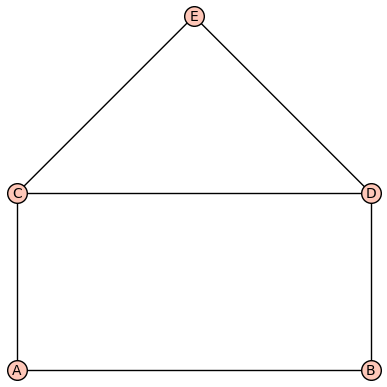

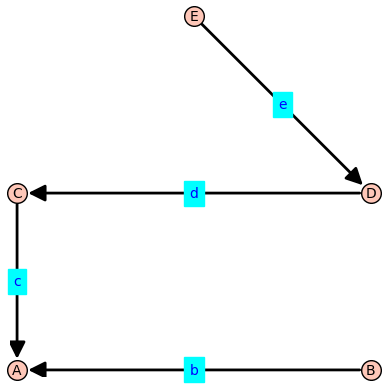

Multivariate Polynomial Ring in b, c, d, e over Integer Ring

[0, b, c, d + c, e + d + c]

['kappa_b', 'kappa_c', 'kappa_d', 'kappa_e']
['\\kappa_{\\mathit{b}}', '\\kappa_{\\mathit{c}}', '\\kappa_{\\mathit{d}}', '\\kappa_{\\mathit{e}}']


\(0\),\(0\),\(0\),\(0\),\(0\)
\(0\),\(b^{2}\),\(b c\),\(b d + b c\),\(b e + b d + b c\)
\(0\),\(b c\),\(c^{2}\),\(c d + c^{2}\),\(c e + c d + c^{2}\)
\(0\),\(b d + b c\),\(c d + c^{2}\),\(d^{2} + 2 c d + c^{2}\),\(d e + c e + d^{2} + 2 c d + c^{2}\)
\(0\),\(b e + b d + b c\),\(c e + c d + c^{2}\),\(d e + c e + d^{2} + 2 c d + c^{2}\),\(e^{2} + 2 d e + 2 c e + d^{2} + 2 c d + c^{2}\)


\(\left[\right]\),\(\left[\right]\),\(\left[\right]\),\(\left[\right]\),\(\left[\right]\)
\(\left[\right]\),\(\left[b^{2}\right]\),\(\left[b c\right]\),"\(\left[b d, b c\right]\)","\(\left[b e, b d, b c\right]\)"
\(\left[\right]\),\(\left[b c\right]\),\(\left[c^{2}\right]\),"\(\left[c d, c^{2}\right]\)","\(\left[c e, c d, c^{2}\right]\)"
\(\left[\right]\),"\(\left[b d, b c\right]\)","\(\left[c d, c^{2}\right]\)","\(\left[d^{2}, c d, c^{2}\right]\)","\(\left[d e, c e, d^{2}, c d, c^{2}\right]\)"
\(\left[\right]\),"\(\left[b e, b d, b c\right]\)","\(\left[c e, c d, c^{2}\right]\)","\(\left[d e, c e, d^{2}, c d, c^{2}\right]\)","\(\left[e^{2}, d e, c e, d^{2}, c d, c^{2}\right]\)"


\(\left[\right]\),\(\left[\right]\),\(\left[\right]\),\(\left[\right]\),\(\left[\right]\)
\(\left[\right]\),\(\left[1\right]\),\(\left[1\right]\),"\(\left[1, 1\right]\)","\(\left[1, 1, 1\right]\)"
\(\left[\right]\),\(\left[1\right]\),\(\left[1\right]\),"\(\left[1, 1\right]\)","\(\left[1, 1, 1\right]\)"
\(\left[\right]\),"\(\left[1, 1\right]\)","\(\left[1, 1\right]\)","\(\left[1, 2, 1\right]\)","\(\left[1, 1, 1, 2, 1\right]\)"
\(\left[\right]\),"\(\left[1, 1, 1\right]\)","\(\left[1, 1, 1\right]\)","\(\left[1, 1, 1, 2, 1\right]\)","\(\left[1, 2, 2, 1, 2, 1\right]\)"


[b^2, b*c, c^2, b*d, c*d, d^2, b*e, c*e, d*e, e^2]

['eta_bb', 'eta_bc', 'eta_cc', 'eta_bd', 'eta_cd', 'eta_dd', 'eta_be', 'eta_ce', 'eta_de', 'eta_ee']
['\\eta_{\\mathit{bb}}', '\\eta_{\\mathit{bc}}', '\\eta_{\\mathit{cc}}', '\\eta_{\\mathit{bd}}', '\\eta_{\\mathit{cd}}', '\\eta_{\\mathit{dd}}', '\\eta_{\\mathit{be}}', '\\eta_{\\mathit{ce}}', '\\eta_{\\mathit{de}}', '\\eta_{\\mathit{ee}}']
{b: kappa_b, c: kappa_c, d: kappa_d, e: kappa_e, b^2: eta_bb, b*c: eta_bc, c^2: eta_cc, b*d: eta_bd, c*d: eta_cd, d^2: eta_dd, b*e: eta_be, c*e: eta_ce, d*e: eta_de, e^2: eta_ee, 1: 1}
[[0, b, c, d + c, e + d + c], [0, 2*b, c + b, d + c + b, e + d + c + b], [0, 0, 2*c, d + 2*c, e + d + 2*c], [0, 0, 0, 2*d + 2*c, e + 2*d + 2*c], [0, 0, 0, 0, 2*e + 2*d + 2*c]]
[[[], [b], [c], [d, c], [e, d, c]], [0, [b], [c, b], [d, c, b], [e, d, c, b]], [0, 0, [c], [d, c], [e, d, c]], [0, 0, 0, [d, c], [e, d, c]], [0, 0, 0, 0, [e, d, c]]]
[[[], [1], [1], [1, 1], [1, 1, 1]], [0, [2], [1, 1], [1, 1, 1], [1, 1, 1, 1]], [0, 0, [2], [1, 2], [1, 1, 2]], [0, 0, 0, [2, 2], [1

[[1, 2*kappa_b, 2*kappa_c, 2*kappa_c*kappa_d, 2*kappa_c*kappa_d*kappa_e],
 [0,
  kappa_b^2*eta_bb,
  2*kappa_b*kappa_c*eta_bc,
  2*kappa_b*kappa_c*kappa_d*eta_bc*eta_bd,
  2*kappa_b*kappa_c*kappa_d*kappa_e*eta_bc*eta_bd*eta_be],
 [0,
  0,
  kappa_c^2*eta_cc,
  2*kappa_c^2*kappa_d*eta_cc*eta_cd,
  2*kappa_c^2*kappa_d*kappa_e*eta_cc*eta_cd*eta_ce],
 [0,
  0,
  0,
  kappa_c^2*kappa_d^2*eta_cc*eta_cd^2*eta_dd,
  2*kappa_c^2*kappa_d^2*kappa_e*eta_cc*eta_cd^2*eta_dd*eta_ce*eta_de],
 [0,
  0,
  0,
  0,
  kappa_c^2*kappa_d^2*kappa_e^2*eta_cc*eta_cd^2*eta_dd*eta_ce^2*eta_de^2*eta_ee]]

In [19]:
(G, T, KappaEta, A) = enumerate_allosteric_parameters(method='alpha',verbose=True)

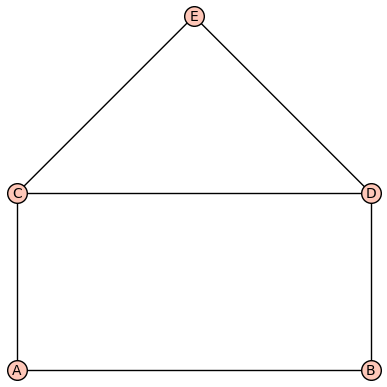

In [20]:
G.show()

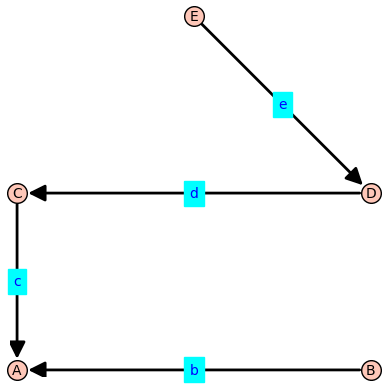

In [21]:
T.show(edge_labels=True)

In [22]:
table(KappaEta)

\(1\),\(2 \kappa_{\mathit{b}}\),\(2 \kappa_{\mathit{c}}\),\(2 \kappa_{\mathit{c}} \kappa_{\mathit{d}}\),\(2 \kappa_{\mathit{c}} \kappa_{\mathit{d}} \kappa_{\mathit{e}}\)
\(0\),\(\kappa_{\mathit{b}}^{2} \eta_{\mathit{bb}}\),\(2 \kappa_{\mathit{b}} \kappa_{\mathit{c}} \eta_{\mathit{bc}}\),\(2 \kappa_{\mathit{b}} \kappa_{\mathit{c}} \kappa_{\mathit{d}} \eta_{\mathit{bc}} \eta_{\mathit{bd}}\),\(2 \kappa_{\mathit{b}} \kappa_{\mathit{c}} \kappa_{\mathit{d}} \kappa_{\mathit{e}} \eta_{\mathit{bc}} \eta_{\mathit{bd}} \eta_{\mathit{be}}\)
\(0\),\(0\),\(\kappa_{\mathit{c}}^{2} \eta_{\mathit{cc}}\),\(2 \kappa_{\mathit{c}}^{2} \kappa_{\mathit{d}} \eta_{\mathit{cc}} \eta_{\mathit{cd}}\),\(2 \kappa_{\mathit{c}}^{2} \kappa_{\mathit{d}} \kappa_{\mathit{e}} \eta_{\mathit{cc}} \eta_{\mathit{cd}} \eta_{\mathit{ce}}\)
\(0\),\(0\),\(0\),\(\kappa_{\mathit{c}}^{2} \kappa_{\mathit{d}}^{2} \eta_{\mathit{cc}} \eta_{\mathit{cd}}^{2} \eta_{\mathit{dd}}\),\(2 \kappa_{\mathit{c}}^{2} \kappa_{\mathit{d}}^{2} \kappa_{\mathit{e}} \eta_{\mathit{cc}} \eta_{\mathit{cd}}^{2} \eta_{\mathit{dd}} \eta_{\mathit{ce}} \eta_{\mathit{de}}\)
\(0\),\(0\),\(0\),\(0\),\(\kappa_{\mathit{c}}^{2} \kappa_{\mathit{d}}^{2} \kappa_{\mathit{e}}^{2} \eta_{\mathit{cc}} \eta_{\mathit{cd}}^{2} \eta_{\mathit{dd}} \eta_{\mathit{ce}}^{2} \eta_{\mathit{de}}^{2} \eta_{\mathit{ee}}\)


In [23]:
show(A)

Multivariate Polynomial Ring in kappa_b, kappa_c, kappa_d, kappa_e, eta_bb, eta_bc, eta_cc, eta_bd, eta_cd, eta_dd, eta_be, eta_ce, eta_de, eta_ee over Integer Ring